In [73]:
import numpy as np
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import os
os.chdir('..')
import virl
from helper_methods import run, plot
from plot_helper import plot as eval_plot
from matplotlib import pyplot as plt
import pickle
import itertools

class EvalData():
    
    NUM_OF_PROBLEM_IDS = 10
    
    def __init__(self, agent_name, stochastic, noisy):
        self.agent_name = agent_name
        self.rewards = {}
        self.stochastic = stochastic
        self.noisy = noisy
        
    def add_rewards(self, problem_id, rewards):
        self.rewards[problem_id] = rewards
        
    def plot(self):
        fig, axes = plt.subplots(5, 2, constrained_layout=True, figsize=(10,10),
                                 subplot_kw={'ylim':(-2.5, 0), 'xlabel':'Episode', 'ylabel':'Reward', 'yticks':np.arange(-2.5, 0, 0.5)})
        fig.suptitle("Stochastic = " + str(self.stochastic) + ", Noisy = " + str(self.noisy))
        
        for x,y in list(itertools.product(range(0, 5), range(0, 2))):
            axes[x, y].plot(np.arange(1, len(self.rewards) + 1), self.rewards[(2*x) + y])
            axes[x, y].set_title(self.get_title((2*x) + y))
            
    def get_title(self, problem_id):
        return self.agent_name + " problem id " + str(problem_id)

    def print_average_reward(self):
        for k,v in self.rewards.items():
            problem_id = str(k)
            reward = np.mean(np.array(v))
            print("ID: " + problem_id + " Reward: " + str(reward))
        
        
def plot(all_rewards, title):
    plt.title("Evaluate: " + title)
    plt.xlabel("Epsiode")
    plt.ylabel("Total Reward")
    plt.plot(all_rewards)


In [8]:
#evaluate the stochastic and noisy parameters
stochastic_noisy = {0:virl.Epidemic(stochastic=False, noisy=False),1:virl.Epidemic(stochastic=True, noisy=False),2:virl.Epidemic(stochastic=False, noisy=True),3:virl.Epidemic(stochastic=True, noisy=True)}
stochastic_noisy_print = {0:"stochastic=False, noisy=False",1:"stochastic=True, noisy=False",2:"stochastic=False, noisy=True",3:"stochastic=True, noisy=True"}


In [9]:
def mean_std(all_total_rewards,all_rewards,title):
    #mean and standard deviation
    total_reward_sd = np.std(all_total_rewards)
    total_reward_mean = np.mean(all_total_rewards)
    reward_sd = np.std(all_rewards)
    reward_mean = np.mean(all_rewards)

    print("---")
    print(title)
    print("Total reward standard deviation = " + str(total_reward_sd))
    print("Total reward mean = " + str(total_reward_mean))
    print("Reward standard deviation = " + str(reward_sd))
    print("Rotal reward mean = " + str(reward_mean))

## Deterministic

In [ ]:
from DeterministicAgent import DeterministicAgent

actions = ["no intervention", "impose a full lockdown", "implement track & trace", "enforce social distancing and face masks"]
stochastic = [False, True]
noisy = [False, True]


for i in range(len(stochastic)):
    for j in range(len(noisy)):
        for action, action_text in enumerate(actions):
            env = virl.Epidemic(stochastic=stochastic[i], noisy=noisy[j])
            agent = DeterministicAgent(env, action, action_text)
            states, rewards = run(agent)
            title = ", Stochastic = " + str(stochastic[i]) + ", " "Noisy = " + str(noisy[j])
            plot(agent, states, rewards, title)

for i in range(0,10):
    for action, action_text in enumerate(actions):
        env = virl.Epidemic(stochastic=True, noisy=True,problem_id=i)
        agent = DeterministicAgent(env, action, action_text)
        states, rewards = run(agent)
        title = ", Problem id=" + str(i)
        plot(agent, states, rewards, title)

## Random

In [ ]:
from RandomAgent import RandomAgent

actions = ["no intervention", "impose a full lockdown", "implement track & trace", "enforce social distancing and face masks"]
stochastic = [False, True]
noisy = [False, True]

for i in range(len(stochastic)):
    for j in range(len(noisy)):
        env = virl.Epidemic(stochastic=stochastic[i], noisy=noisy[j])
        agent = RandomAgent(env, actions)
        states, rewards = run(agent)
        plot(agent, states, rewards)
        
for i in range(0,10):
    env = virl.Epidemic(stochastic=True, noisy=True,problem_id=i)
    agent = RandomAgent(env, actions)
    states, rewards = run(agent)
    title = ", Problem id=" + str(i)
    plot(agent, states, rewards, title)

## Linear Policy

In [ ]:
%cd
%cd ai-coursework-group6\notebooks\linear_aprx_output
%pwd

for i in range(0,10):
    title = "Linear Policy Evaluate: problem id " + str(i) + " "
    
    intercept = np.genfromtxt("interceptP" + str(i) + ".csv", delimiter=',')
    coeff = np.genfromtxt("coeffP" + str(i) + ".csv", delimiter=',')
    state_transformed = np.genfromtxt("state_transformedP" + str(i) + ".csv", delimiter=',')
    q_value = np.genfromtxt("q_valueP" + str(i) + ".csv", delimiter=',')
    
    states,all_rewards, all_total_rewards,func_approximator, state_transformed, q_value = agent.evaluate()
    eval_plot(states,agent, all_total_rewards, all_rewards,title)
   

In [ ]:
for i in range(0,4):
    print(stochastic_noisy_print[i])
    title = "Linear Policy Evaluate:" + stochastic_noisy_print
    
    intercept = np.genfromtxt("interceptP" + str(i) + ".csv", delimiter=',')
    coeff = np.genfromtxt("coeffP" + str(i) + ".csv", delimiter=',')
    state_transformed = np.genfromtxt("state_transformedP" + str(i) + ".csv", delimiter=',')
    q_value = np.genfromtxt("q_valueP" + str(i) + ".csv", delimiter=',')
    
    states,all_rewards, all_total_rewards,func_approximator, state_transformed, q_value = agent.evaluate()
    eval_plot(states,agent, all_total_rewards, all_rewards,title)

## Tabular Policy

In [ ]:
%cd
%cd ai-coursework-group6\notebooks
%pwd

for i in range(0,10):
    title = "Q Learning Evaluate: problem id " + str(i) + " "
    
    with open('qlearningP' + str(i) + '.pkl', 'rb') as inpt:
        agent = pickle.load(inpt)
        states,all_rewards, all_total_rewards = agent.evaluate()
        eval_plot(states,agent, all_total_rewards, all_rewards,title)
        mean_std(all_total_rewards,all_rewards,title)
        
        


In [ ]:

for i in range(0,4):
    print(stochastic_noisy_print[i])
    title = "Q Learning Evaluate:" + stochastic_noisy_print
    
    with open('qlearningS' + str(i) + '.pkl', 'rb') as inpt:
        agent = pickle.load(inpt)
    states,all_rewards, all_total_rewards = agent.evaluate()
    eval_plot(states,agent, all_total_rewards, all_rewards,title)
    mean_std(all_total_rewards,all_rewards,title)

## Q learning

In [10]:
from q_learning_tabular.q_table import QTable
from q_learning_tabular.q_learning_agent import QLearningAgent

In [11]:
def evaluate_q_learning_tabular(eval_data):
    for i in range(0,10):
        filename = "q_learning_tabular_problem_id_" + str(i) + ".txt"
        internal_loaded_q_table = QTable.load_raw_q_table_from_file(filename)
        env = virl.Epidemic(stochastic=eval_data.stochastic, noisy=eval_data.noisy, problem_id=i)
        agent = QLearningAgent(env, print_out_every_x_episodes=1, internal_q_table=internal_loaded_q_table, )
        all_total_rewards = agent.evaluate(10)
        eval_data.add_rewards(i, all_total_rewards)
    return eval_data

C:\Users\euanf\OneDrive\University\Computing\Year4\ArtificialIntelligence
C:\Users\euanf\OneDrive\University\Computing\Year4\ArtificialIntelligence\ai-coursework-group6
ID: 0 Reward: -1.4660156324490605
ID: 1 Reward: -0.6274209971414105
ID: 2 Reward: -1.2553812610769453
ID: 3 Reward: -1.1345669452150648
ID: 4 Reward: -1.6983870575865034
ID: 5 Reward: -1.437057058121612
ID: 6 Reward: -1.8718395254825038
ID: 7 Reward: -2.029841963173881
ID: 8 Reward: -1.850039842496934
ID: 9 Reward: -2.0080755218353508


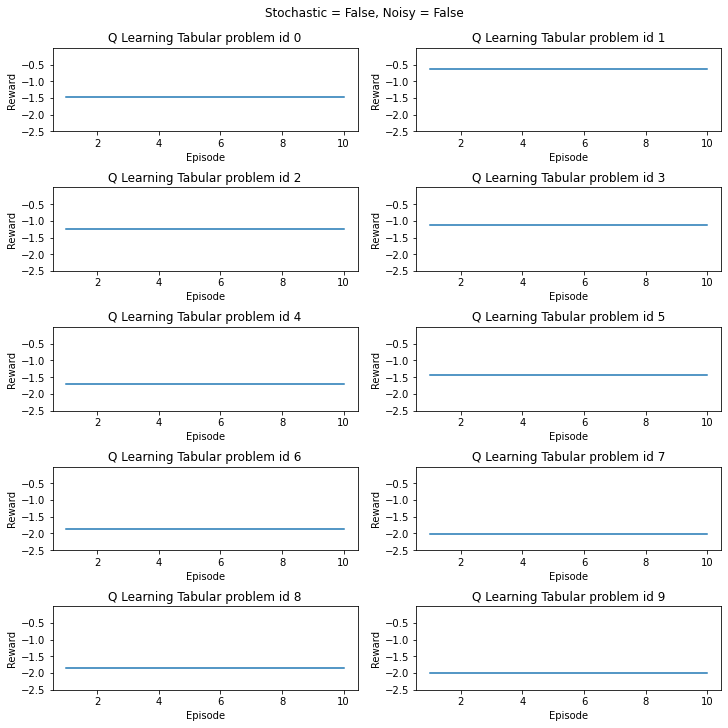

In [75]:
print(os.getcwd())
os.chdir("ai-coursework-group6")
print(os.getcwd())

eval_data = EvalData("Q Learning Tabular", stochastic=False, noisy=False)
evaluate_q_learning_tabular(eval_data)
eval_data.plot()

eval_data.print_average_reward()

## Q learning Neural Network

In [1]:
from q_learning_nn.nn_function_approximator import NNFunctionApproximatorJointKeras, init_networks, load_trained_network
from q_learning_nn.memory import ReplayMemory, Transition
from q_learning_nn.agent import Agent
from q_learning_nn.strategy import Strategy
from q_learning_nn.run import qlearning_nn

In [4]:
def evaluate_q_learning_nn(stochastic, noisy):
    for i in range(0,10):
        filename = "policy_network_problem_id_" + str(i) + ".h5"
        policy_network_new, target_network_new = load_trained_network(filename)
        agent = Agent(virl.Epidemic(stochastic=stochastic, noisy=noisy, problem_id=i), learning_rate=0.0)
        rewards = qlearning_nn(
            agent=agent, policy_network=policy_network_new, target_network=target_network_new, num_episodes=1
        )
        title = "Q Learning NN with problem id " + str(i)
        plot(rewards, title)

/Users/mohammadmajid/Documents/ai/ai-coursework-group6
Evaluation reward -0.8667918869030464


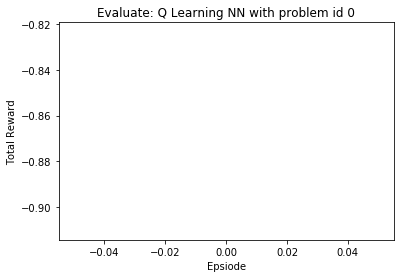

In [11]:
# print(os.getcwd())
# os.chdir("ai-coursework-group6")
# print(os.getcwd())
evaluate_q_learning_nn(stochastic=False, noisy=False)